In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

21834768/21834768 [==============================] - 2s 0us/step


In [ ]:
#EfficientNetB0 on example dataset - Stanford Dogs
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.applications import EfficientNetB0

In [ ]:
#Image size is dependent on efficientnet model choice - each one is different
IMG_SIZE = 224
BATCH_SIZE = 64

In [ ]:
dataset_name = "stanford_dogs"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name,
    split=["train", "test"],
    with_info=True,
    as_supervised=True
)
NUM_CLASSES = ds_info.features["label"].num_classes

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteB3OPQH/stanford_dogs-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteB3OPQH/stanford_dogs-test.tfrecord*...:   0%…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=120),
    'objects': Sequence({
        'bbox': BBoxFeature(shape=(4,), dtype=float32),
    }),
})

In [ ]:
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>
Shape: (224, 224, 3)


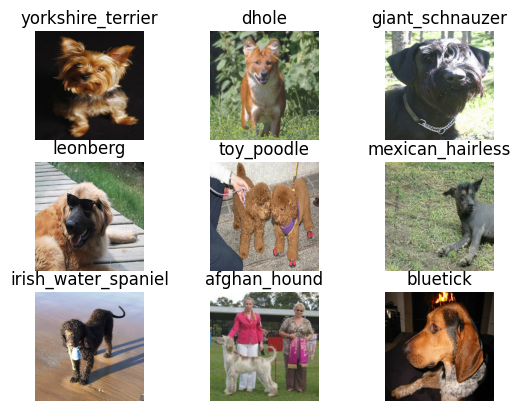

In [ ]:
#Visualise data
def format_label(label):
  string_label = label_info.int2str(label)
  return string_label.split("-")[1]

label_info = ds_info.features["label"]
for i, (image, label) in enumerate(ds_train.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  print(type(image))
  plt.imshow(image.numpy().astype("uint8"))
  print("Shape:",image.shape)
  plt.title(f"{format_label(label)}")
  plt.axis("off")

In [ ]:
#Data Augmentation
img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.1),
]

def img_augmentation(images):
  for layer in img_augmentation_layers:
    images = layer(images)
  return images

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


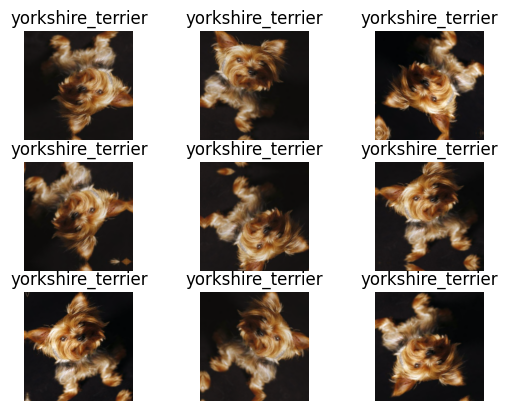

In [ ]:
for image, label in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    aug_img = img_augmentation(np.expand_dims(image.numpy(), axis=0)) #giving batch dimension as image augmentation expects this
    aug_img = np.array(aug_img)
    print(aug_img.shape)
    plt.imshow(aug_img[0].astype("uint8"))
    plt.title(f"{format_label(label)}")
    plt.axis("off")


In [ ]:
#Prepare inputs
#one hot or categorical encoding
def input_preprocess_train(image, label):
  image = img_augmentation(image)
  label = tf.one_hot(label, NUM_CLASSES)
  return image, label

def input_preprocess_test(image, label):
  label = tf.one_hot(label, NUM_CLASSES)
  return image, label


ds_train = ds_train.map(input_preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.batch(batch_size=BATCH_SIZE, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size=BATCH_SIZE, drop_remainder=True)


In [ ]:
type(ds_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
#Training the model from scratch - efficientnetB0 is being initialized from scratch
model = EfficientNetB0(
    include_top=True,
    weights=None,
    classes=NUM_CLASSES,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
)

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

epochs = 40
history = model.fit(ds_train,
                    epochs=40,
                    validation_data=ds_test)


Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 225, 225, 3)          0         ['normalization_1

In [ ]:
def plot_history(history):
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]

  plt.plot(train_acc, label="Training Accuracy")
  plt.plot(val_acc, label="validation Accuracy")
  plt.title("Training vs Validation Acc")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

In [ ]:
#Transfer Learning using pre-trained ImageNet weights
def build_model(num_classes):
  inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
  model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

  #freeze pretrained weights
  model.trainable = False
  model.summary()
  #Rebuild top
  x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  x = layers.BatchNormalization()(x)

  top_dropout_rate = 0.2
  x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

  #Compile
  model = keras.Model(inputs, outputs, name="EfficientNet")
  optimizer = keras.optimizers.Adam(learning_rate=1e-2)
  model.compile(optimizer=optimizer,
                loss="categorical_crossentropy",
                metrics=["accuracy"])

  return model

16705208/16705208 [==============================] - 2s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_3[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_4 (Rescal

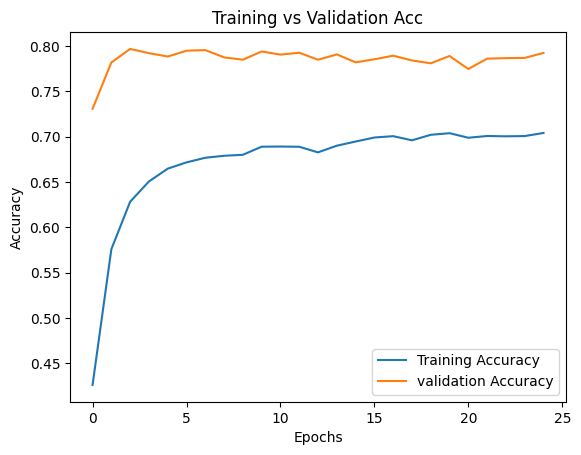

In [ ]:
model = build_model(num_classes=NUM_CLASSES)

epochs = 25
history = model.fit(
    ds_train,
    epochs=epochs,
    validation_data=ds_test
)

plot_history(history)

Epoch 1/4
187/187 [==============================] - 31s 130ms/step - loss: 0.9115 - accuracy: 0.7398 - val_loss: 0.7550 - val_accuracy: 0.8000
Epoch 2/4
187/187 [==============================] - 23s 122ms/step - loss: 0.8421 - accuracy: 0.7513 - val_loss: 0.7285 - val_accuracy: 0.8071
Epoch 3/4
187/187 [==============================] - 23s 121ms/step - loss: 0.7937 - accuracy: 0.7645 - val_loss: 0.7156 - val_accuracy: 0.8135
Epoch 4/4
187/187 [==============================] - 23s 121ms/step - loss: 0.7820 - accuracy: 0.7665 - val_loss: 0.7070 - val_accuracy: 0.8158


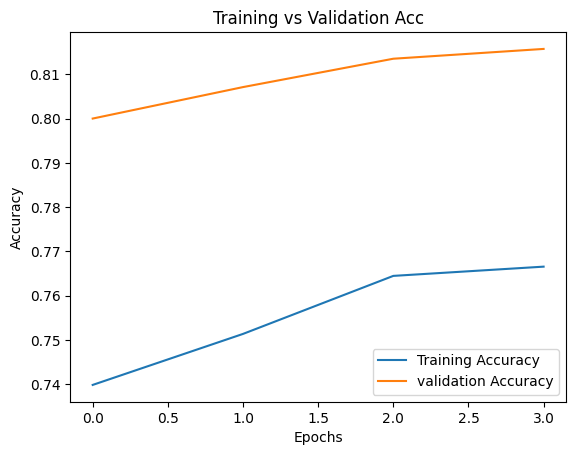

In [ ]:
#Unfreeze only some layers
def unfreeze_model(model):
  #unfreezing the top 20 layers while leaving batchnorm layers frozen
  for layer in model.layers[-20:]:
    if not isinstance(layer, layers.BatchNormalization):
      layer.trainable = True

  optimizer = keras.optimizers.Adam(learning_rate=1e-5)
  model.compile(
      optimizer=optimizer,
      loss="categorical_crossentropy",
      metrics=["accuracy"]
  )

unfreeze_model(model)

epochs = 4
history = model.fit(
    ds_train,
    epochs=epochs,
    validation_data=ds_test
)

plot_history(history)
